In [18]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------------------
import warnings
warnings.filterwarnings("ignore")



## Pre-Processing
Load Data

In [5]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [6]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [7]:
tr_df = train_df('D:/New folder/DAA Lab/Files/Training')
tr_df

,Class Path,Class
0,D:/New folder/DAA Lab/Files/Training\glioma\Tr...,glioma
1,D:/New folder/DAA Lab/Files/Training\glioma\Tr...,glioma
2,D:/New folder/DAA Lab/Files/Training\glioma\Tr...,glioma
3,D:/New folder/DAA Lab/Files/Training\glioma\Tr...,glioma
4,D:/New folder/DAA Lab/Files/Training\glioma\Tr...,glioma
...,...,...
5707,D:/New folder/DAA Lab/Files/Training\pituitary...,pituitary
5708,D:/New folder/DAA Lab/Files/Training\pituitary...,pituitary
5709,D:/New folder/DAA Lab/Files/Training\pituitary...,pituitary
5710,D:/New folder/DAA Lab/Files/Training\pituitary...,pituitary


In [8]:
ts_df = test_df('D:/New folder/DAA Lab/Files/Testing')
ts_df

,Class Path,Class
0,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
1,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
2,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
3,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
4,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
...,...,...
1306,D:/New folder/DAA Lab/Files/Testing\pituitary\...,pituitary
1307,D:/New folder/DAA Lab/Files/Testing\pituitary\...,pituitary
1308,D:/New folder/DAA Lab/Files/Testing\pituitary\...,pituitary
1309,D:/New folder/DAA Lab/Files/Testing\pituitary\...,pituitary


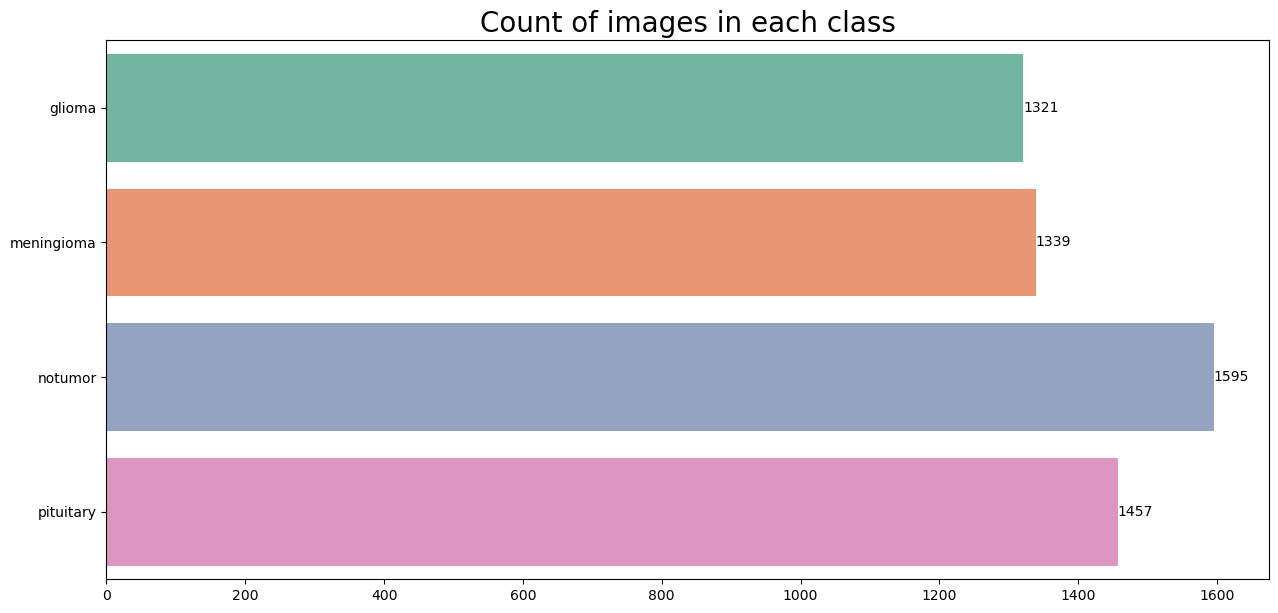

In [9]:
# Count of images in each class in train data
plt.figure(figsize=(15, 7))
palette = 'Set2'  
ax = sns.countplot(data=tr_df, y=tr_df['Class'], palette=palette)

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


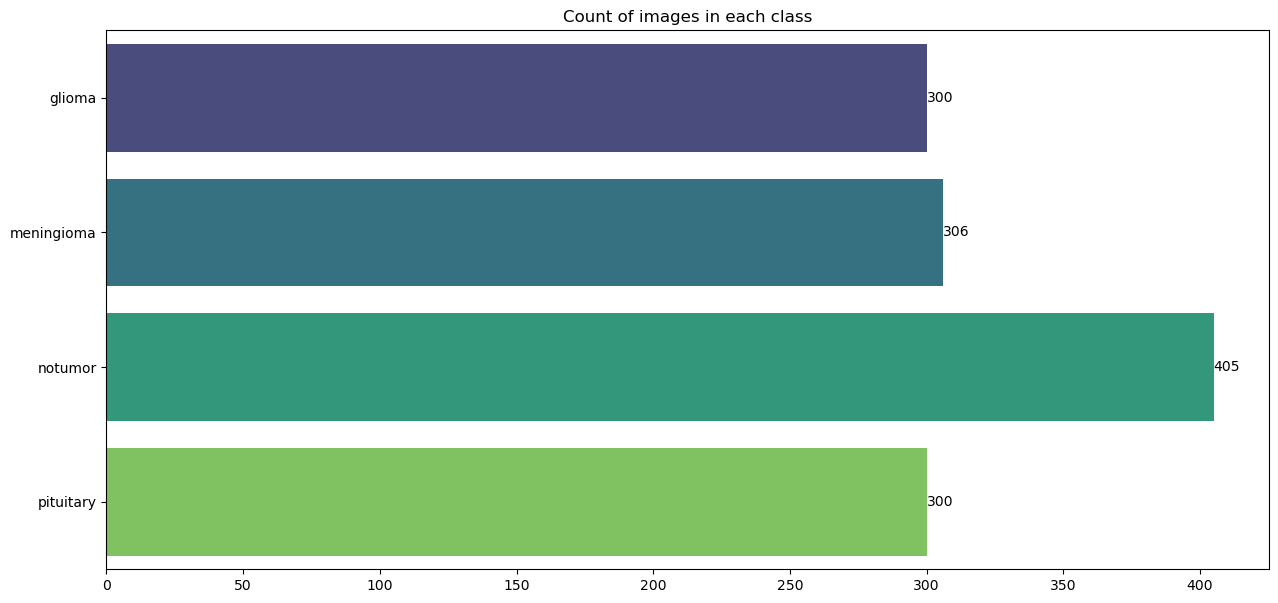

In [10]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

## Split Data

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
286,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
318,D:/New folder/DAA Lab/Files/Testing\meningioma...,meningioma
1072,D:/New folder/DAA Lab/Files/Testing\pituitary\...,pituitary
373,D:/New folder/DAA Lab/Files/Testing\meningioma...,meningioma
109,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
...,...,...
59,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
860,D:/New folder/DAA Lab/Files/Testing\notumor\Te...,notumor
273,D:/New folder/DAA Lab/Files/Testing\glioma\Te-...,glioma
494,D:/New folder/DAA Lab/Files/Testing\meningioma...,meningioma


Data Preprocessing

In [13]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


Samples

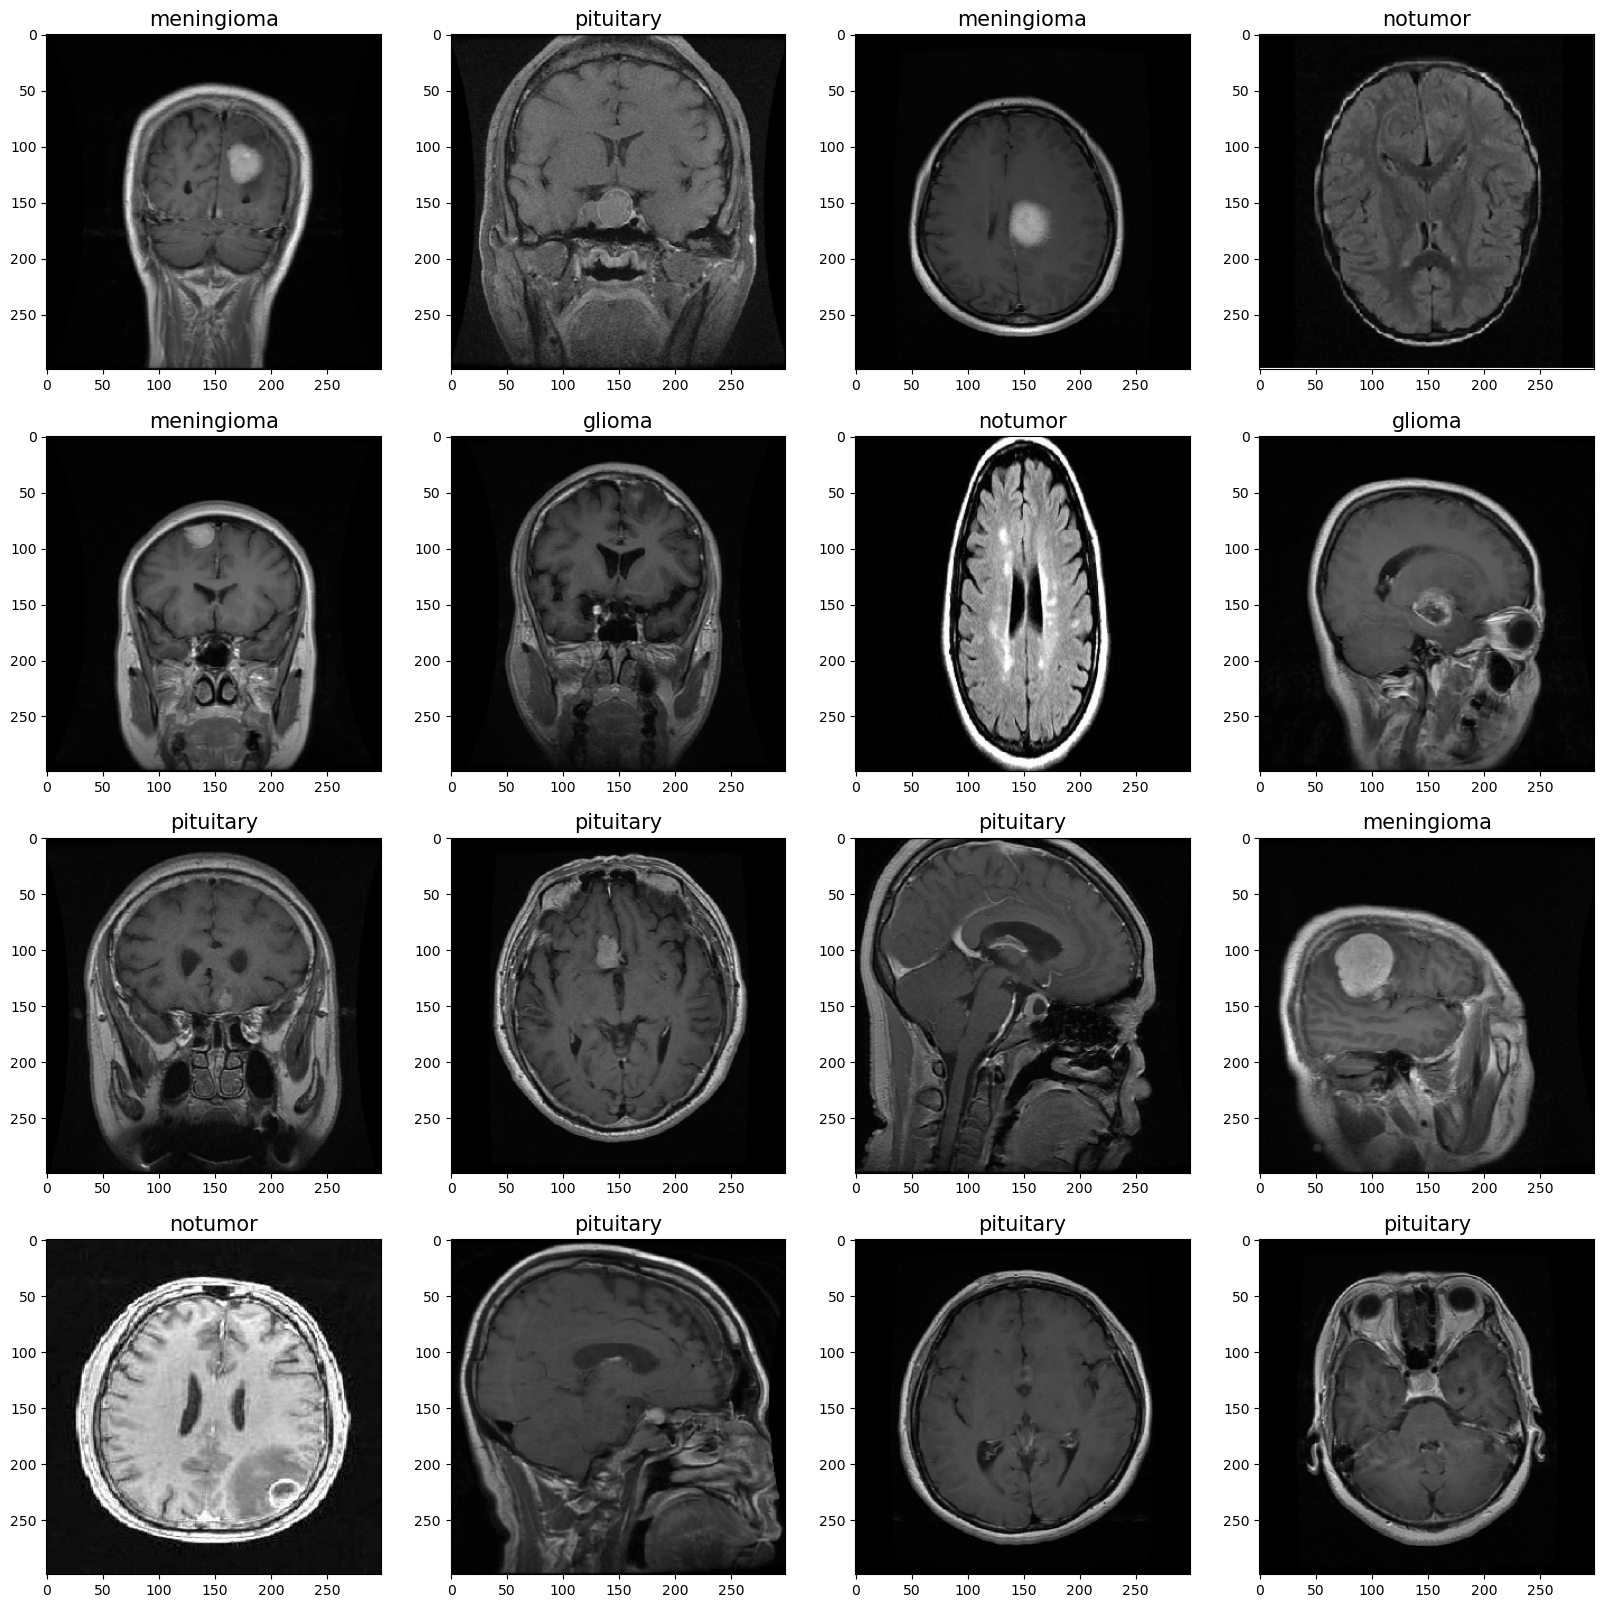

In [21]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

Build DL

In [19]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

Training

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1401s 8s/step - accuracy: 0.7907 - loss: 0.6170 - precision_1: 0.8375 - recall_1: 0.7359 - val_accuracy: 0.9176 - val_loss: 0.2292 - val_precision_1: 0.9176 - val_recall_1: 0.9176
Epoch 2/10
  9/179 ━━━━━━━━━━━━━━━━━━━━ 21:14 7s/step - accuracy: 0.9820 - loss: 0.0632 - precision_1: 0.9820 - recall_1: 0.9820

In [ ]:
hist.history.keys()